# Datamining Project - Spotify Dataset

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

## Data understanding and preparation

### Dataset Import and simple data visualization

In [3]:
df_train = pd.read_csv('train.csv', skipinitialspace=True)

df_test = pd.read_csv('test.csv', skipinitialspace=True)

In [8]:
df_test.columns

Index(['name', 'duration_ms', 'explicit', 'popularity', 'artists',
       'album_name', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'features_duration_ms', 'time_signature', 'n_beats',
       'n_bars', 'popularity_confidence', 'processing', 'genre'],
      dtype='object')

In [9]:
df_train

,name,duration_min,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_min,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,4.01,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.2810,0.6350,142.221,4.01,4.0,567.0,141.0,NaN,1.279305,0
1,"Daniâl My Son, Where Did You Vanish?",7.24,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.3600,0.0336,75.596,7.24,4.0,617.0,155.0,NaN,2.367412,1
2,Ondskapens Galakse,5.33,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.2620,0.4890,116.628,5.33,4.0,652.0,162.0,NaN,3.700483,2
3,Can't Look Away,4.29,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.1170,0.3850,140.880,4.29,4.0,619.0,155.0,0.469,1.279305,3
4,Thunderground,5.07,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.2990,0.6370,143.956,5.07,4.0,733.0,183.0,NaN,4.067086,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Outpt,7.12,False,0,Autechre,EP7,0.554,0.657,1,-14.232,...,0.1320,0.0335,117.319,7.12,NaN,837.0,212.0,NaN,2.367412,15
14996,Natural Environment Sounds: To Improve Sleep a...,3.02,False,44,Natural White Noise Relaxation,Baby Sleep White Noise: Ultimate Album to Help...,0.103,0.860,1,-19.627,...,0.1230,0.0016,92.323,3.02,3.0,277.0,92.0,NaN,2.367412,8
14997,Psychological Attack,6.40,False,43,Droplex,Psychological Attack,0.799,0.535,1,-9.103,...,0.0713,0.0708,126.000,6.40,4.0,837.0,209.0,NaN,2.367412,9
14998,Don't Hate The 808 (feat. Lafa Taylor),3.17,False,37,Bassnectar;Lafa Taylor,Noise vs Beauty,0.511,0.970,5,-2.299,...,0.4020,0.2700,160.044,3.17,4.0,513.0,130.0,NaN,1.279305,19


In [8]:
df_train.shape

(15000, 24)

In [9]:
df_train.dtypes

name                      object
duration_min             float64
explicit                    bool
popularity                 int64
artists                   object
album_name                object
danceability             float64
energy                   float64
key                        int64
loudness                 float64
mode                     float64
speechiness              float64
acousticness             float64
instrumentalness         float64
liveness                 float64
valence                  float64
tempo                    float64
features_duration_min    float64
time_signature           float64
n_beats                  float64
n_bars                   float64
popularity_confidence    float64
processing               float64
genre                      int64
dtype: object

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   15000 non-null  object 
 1   duration_min           15000 non-null  float64
 2   explicit               15000 non-null  bool   
 3   popularity             15000 non-null  int64  
 4   artists                15000 non-null  object 
 5   album_name             15000 non-null  object 
 6   danceability           15000 non-null  float64
 7   energy                 15000 non-null  float64
 8   key                    15000 non-null  int64  
 9   loudness               15000 non-null  float64
 10  mode                   10550 non-null  float64
 11  speechiness            15000 non-null  float64
 12  acousticness           15000 non-null  float64
 13  instrumentalness       15000 non-null  float64
 14  liveness               15000 non-null  float64
 15  va

In [11]:
df_train.describe()

,duration_min,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_min,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,10550.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,12938.000000,15000.000000,15000.00000,2217.000000,15000.000000,15000.000000
mean,3.912149,27.423667,0.551063,0.656231,5.287867,-8.894999,0.631374,0.083779,0.303896,0.286734,0.216790,0.436853,123.116544,3.911983,3.876179,501.862333,128.39340,0.490479,2.199647,9.500000
std,2.135786,18.587534,0.194239,0.264371,3.585023,6.005799,0.482455,0.086709,0.329536,0.382930,0.195295,0.277220,31.930958,2.135685,0.566491,280.689804,75.11391,0.291330,1.212616,5.766474
min,0.080000,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080000,0.000000,0.000000,0.00000,0.000000,0.748116,0.000000
25%,3.000000,14.000000,0.441000,0.480000,2.000000,-10.636250,0.000000,0.037300,0.009745,0.000000,0.097900,0.196000,99.939000,3.000000,4.000000,327.000000,83.00000,0.230000,1.170953,4.750000
50%,3.470000,24.000000,0.580000,0.709000,5.000000,-7.303000,1.000000,0.051000,0.155000,0.003130,0.131000,0.416000,124.188000,3.470000,4.000000,461.000000,117.00000,0.480000,1.738916,9.500000
75%,4.480000,42.000000,0.695000,0.884000,8.000000,-5.101000,1.000000,0.088600,0.573000,0.744000,0.280000,0.664000,141.986500,4.480000,4.000000,625.000000,159.00000,0.739000,3.349057,14.250000
max,68.400000,94.000000,0.980000,1.000000,11.000000,3.156000,1.000000,0.939000,0.996000,1.000000,0.994000,0.995000,220.525000,68.400000,5.000000,7348.000000,2170.00000,1.000000,4.067086,19.000000


In [12]:
df_mean = df_train.drop(columns=['name', 'explicit', 'artists','mode','popularity_confidence', 'album_name', 'features_duration_ms'], axis=1)
df_mean.groupby(['genre']).mean().T

KeyError: "['features_duration_ms'] not found in axis"

### Checking for duplicated records

In [ ]:
# Checking for duplicated records
print(df_train.duplicated().sum(), df_test.duplicated().sum())


In [ ]:
# Checking for duplicated songs
print(df_train['name'].duplicated().sum(), df_test['name'].duplicated().sum())

In [ ]:
# Checking differences between duration_ms and features_duration_ms, also there we can notice that most records differ by 1

values = df_train[df_train['duration_ms'] != df_train['features_duration_ms']]
columns_to_print = ['duration_ms', 'features_duration_ms']
values[columns_to_print]

valu = values['features_duration_ms'] - values['duration_ms']

print("Number of different records: ", valu.size)

differences_count = 0
for i in valu:
    if(i != 1 and i != -1):
        differences_count += 1
        
print("Number of different records with a difference greater than 1: ", differences_count)

### Checking for NaN values

In [ ]:
for column in list(df_train.columns):
    containsNaN = df_train[column].isnull().sum()
    if(containsNaN):
        print("Column: " + column + " hasNaN: " + str(containsNaN))

In [ ]:
for column in list(df_test.columns):
    containsNaN = df_test[column].isnull().sum()
    if(containsNaN):
        print("Column: " + column + " hasNaN: " + str(containsNaN))

In [ ]:
df_test['popularity_confidence'].isnull().sum()

### Data distribution


In [ ]:
df_train.groupby('genre')['popularity'].mean().sort_values().plot(kind='bar')
plt.ylabel('popularity')
plt.show()

In [ ]:
df_train['genre'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
#Plotting the distribution of the features

fig = plt.figure (figsize = (10,10))
fig_dims = (4,4)

plt.subplot2grid(fig_dims, (0,0))
df_train['explicit'].value_counts().plot(kind='bar', title='Explicit and not explicit songs')

plt.subplot2grid(fig_dims, (0,1))
df_train['mode'].value_counts().plot(kind='bar', title='Major and minor songs')

plt.subplot2grid(fig_dims, (1,0))
df_train['acousticness'].hist()
plt.title('Acousticness')

plt.subplot2grid(fig_dims, (1,1))
df_train['danceability'].hist()
plt.title('Danceability')

plt.subplot2grid(fig_dims, (2,0))
df_train['energy'].hist()
plt.title('Energy')

plt.subplot2grid(fig_dims, (2,1))
df_train['instrumentalness'].hist()
plt.title('Instrumentalness')

plt.subplot2grid(fig_dims, (0,2))
df_train['liveness'].hist()
plt.title('Liveness')

plt.subplot2grid(fig_dims, (1,2))
df_train['loudness'].hist()
plt.title('Loudness')

plt.subplot2grid(fig_dims, (2,2))
df_train['speechiness'].hist()
plt.title('Speechiness')

plt.subplot2grid(fig_dims, (0,3))
df_train['tempo'].hist()
plt.title('Tempo')

plt.subplot2grid(fig_dims, (1,3))
df_train['valence'].hist()
plt.title('Valence')

plt.subplot2grid(fig_dims, (2,3))
df_train['popularity'].hist()
plt.title('Popularity')

plt.subplot2grid(fig_dims, (3,0))
df_train['key'].hist()
plt.title('Key')

plt.subplot2grid(fig_dims, (3,1))
df_train['time_signature'].hist()
plt.title('Time signature')

plt.subplot2grid(fig_dims, (3,2))
df_train['popularity_confidence'].hist()
plt.title('Popularity confidence')

plt.subplot2grid(fig_dims, (3,3))
df_train['duration_ms'].hist()
plt.title('Duration_ms histogram')

plt.tight_layout()
plt.show()

In [ ]:
#Plotting the distribution of the n_beats feature
plt.hist(df_train['n_beats'], bins=[0, 200, 400, 600, 800, 1000, 1300, max(df_train['n_beats'])], edgecolor='black')
plt.title('Number of beats')


In [ ]:
#Plotting the distribution of the n_bars feature
plt.hist(df_train['n_bars'], bins=[0,50, 100,150, 200, 250,300,400, max(df_train['n_bars'])], edgecolor='black')
plt.title('Number of bars')

In [ ]:
#Normal distribution of numerical values
from scipy.stats import norm

for attribute in list(df_train.columns):
    if(df_train[attribute].dtype == np.float64 or df_train[attribute].dtype == np.int64):
        x = np.linspace(df_train[attribute].min(), df_train[attribute].max(), 1000)

        mu = df_train[attribute].mean()
        sigma = df_train[attribute].std()

        # Calculate the PDF
        pdf = norm.pdf(x, loc=mu, scale=sigma)

        plt.figure(figsize=(8, 6))
        plt.plot(x, pdf, 'r', label='PDF')
        plt.xlabel(attribute)
        plt.ylabel('PDF Value')
        plt.title('Normal Distribution of ' + attribute)
        plt.legend()
        plt.grid()
        plt.show()

### Genre splitting and analysis

In [ ]:
len(list(df_train['genre'].unique()))

In [ ]:
genresData = []
for genre in df_train['genre'].unique():
    genresData.append(df_train[df_train['genre'] == genre])
    
genresData[0].describe()

In [ ]:
# Initialize empty lists to store information
genre_list = []
feature_1_list = []
feature_2_list = []
correlation_list = []

for genre_df in genresData:
    # Drop NaN values and unwanted columns
    genre_df = genre_df.dropna(axis=1)
    genre_df = genre_df.drop(columns=['name', 'explicit', 'artists', 'album_name', 'features_duration_ms'], axis=1)
    genre = genre_df.iloc[0]['genre']
    
    for feature_1 in list(genre_df.columns):
        if feature_1 != 'genre':
            for feature_2 in list(genre_df.columns):
                if feature_2 != 'genre' and feature_1 != feature_2:
                    corr, p_val = pearsonr(genre_df[feature_1], genre_df[feature_2])
                    if abs(corr) > 0.7:  # Filter based on correlation threshold
                        if not feature_1 in feature_2_list or not feature_2 in feature_1_list:
                            genre_list.append(genre)
                            feature_1_list.append(feature_1)
                            feature_2_list.append(feature_2)
                            correlation_list.append(corr)

# Create a DataFrame from the lists
correlation_df = pd.DataFrame({
    'genre': genre_list,
    'feature_1': feature_1_list,
    'feature_2': feature_2_list,
    'correlation': correlation_list
})

correlation_df


In [ ]:
features_list = list(set(feature_1_list)) + list(set(feature_2_list))
features_list

In [ ]:

df_scatter_matrix = df_train.drop(columns=['name', 'artists', 'genre', 'explicit','album_name'])

    
    
pd.plotting.scatter_matrix(df_scatter_matrix[list(set(features_list))], figsize=(16, 8))
plt.show()



### Data transformation
#### Changing duration_ms and feature_duration_ms in minutes:seconds format


In [ ]:
# metto i generi in un array
genres = df_train['genre'].unique()
# creo un dizionario per tenerli associati ad un numero
genres_dict = dict(zip(genres, range(len(genres))))

In [ ]:
# Mappo i generi con i numeri
df_train['genre'] = df_train['genre'].map(genres_dict)
df_test['genre'] = df_test['genre'].map(genres_dict)
print(genres_dict)

In [ ]:
for i,elem in enumerate(list(df_train["features_duration_ms"])):
    milliseconds = elem
    seconds, milliseconds = divmod(milliseconds, 1000)
    minutes, seconds = divmod(seconds, 60)
    df_train.at[i,"features_duration_min"]= minutes + (seconds / 100)

for i,elem in enumerate(list(df_train["duration_ms"])):
    milliseconds = elem
    seconds, milliseconds = divmod(milliseconds, 1000)
    minutes, seconds = divmod(seconds, 60)
    df_train.at[i,"duration_min"]= minutes + (seconds / 100)

duration_min = df_train.pop('duration_min')
df_train.insert(df_train.columns.get_loc('duration_ms') + 1, 'duration_min', duration_min)
df_train.pop('duration_ms')

features_duration_min = df_train.pop('features_duration_min')
df_train.insert(df_train.columns.get_loc('features_duration_ms') + 1, 'features_duration_min', features_duration_min)
df_train.pop('features_duration_ms')

### Data correlation

Text(0.5, 1.0, 'Scatter plot of duration_min and feature_duration_min')

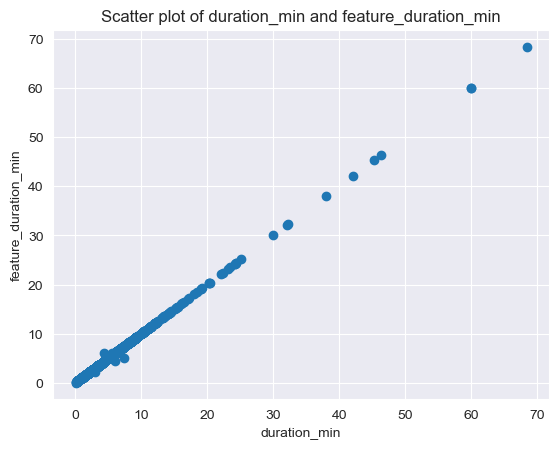

In [12]:
##Scatter plot of 'duration_ms' and 'feature_duration_ms'
plt.scatter(df_train['duration_min'], df_train['features_duration_min'])
plt.xlabel('duration_min')
plt.ylabel('feature_duration_min')
plt.title('Scatter plot of duration_min and feature_duration_min')

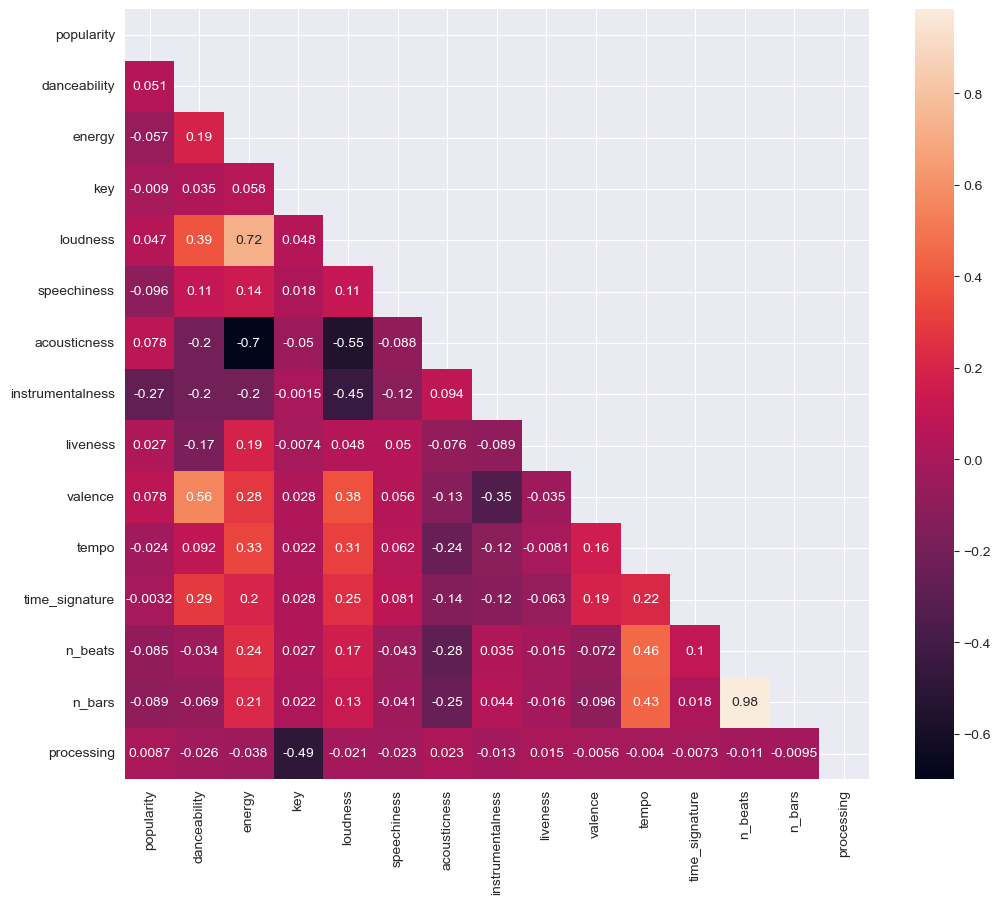

In [13]:
#Pearson correlation heatmap
df_mean = df_train.drop(columns=['name', 'explicit', 'artists','mode','popularity_confidence', 'album_name', 'genre', 'duration_min', 'features_duration_min'], axis=1)

# Compute the correlation matrix and make it larger
plt.figure(figsize=(12, 10))
corr = df_mean.corr()
mask = np.triu(np.ones_like(corr), k=0)  # k=0 means the diagonal and elements below it

sns.heatmap(corr, annot=True, mask=mask)
plt.show()

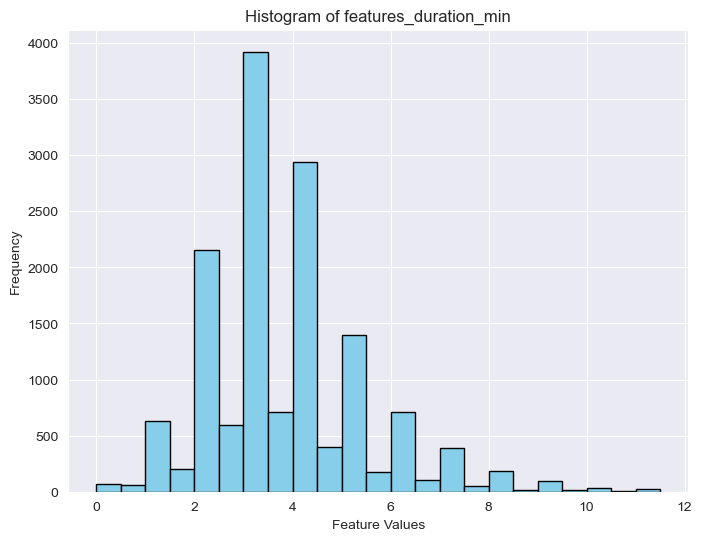

In [15]:
plt.figure(figsize=(8, 6))  # Set the figure size

# You can customize the number of bins, color, and other options in the `hist` function.
# Here, we're using 20 bins by default.
bin_values = np.arange(0, 12, 0.5)
plt.hist(df_train["features_duration_min"], bins=bin_values, color='skyblue', edgecolor='black')

# Set labels and title
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.title(f'Histogram of features_duration_min')

# Show the histogram
plt.show()

In [14]:
print(df_train['mode'].mean())
print(df_train['mode'].median())
print(df_train['mode'].mode())

0.6313744075829384
1.0
0    1.0
Name: mode, dtype: float64
